In [4]:
from sympy import symbols,Matrix,diff, sqrt,print_latex
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
        "font.weight": "bold",  # bold fonts
        "font.size":10,
        "lines.linewidth": 2,   # thick lines
        "grid.color": "0.5",    # gray gridlines
        "grid.linewidth": 0.5,  # thin gridlines
        "savefig.dpi": 300,     # higher resolution output.
        "axes.labelsize" : 15,
        'legend.labelspacing':0.95
    })

In [5]:
# define symbols
#Machine Symbols
Edd,Eqd,delta,d_w = symbols(['E_dd','E_qd','delta','delta_omega'])
Pm,Pref,Psv,Efd,Vref= symbols(['P_m','P_ref','P_sv','E_fd','V_ref'])
xd,xdd,xq,xqd,Td0,Tq0,J,D,Rd,Rsg = symbols(['x_d','x_dd','x_q','x_qq','T_d0','T_q0','J','D','R_d','R_sg'])
Ka,Ta, Tsv, Tch,Rd = symbols(['K_a','T_a','T_sv','T_ch','R_d']) 
#Inverter Symbols
Ifd,Ifq,Vcd,Vcq,Iod,Ioq,Vod,Voq = symbols(['I_fd','I_fq','V_cd','V_cq','I_od','I_oq','V_od','V_oq'])
Rf,Lf,w,Cf,Rc,Lc,Vdc = symbols(['R_f','L_f','omega','C_f','R_c','L_c','V_dc'])
RL,XL,md,mq,Tinv = symbols(['R_L',"X_L","m_d","m_q","T_inv"])
Vid,Viq,Kinv = symbols(['V_id','V_iq','K_inv'])
Ibase,Vbase = symbols(['I_base','V_base'])

In [6]:
Vod = Iod*RL - Ioq*XL
Voq = Iod*XL + Ioq*RL

md = (Edd - Ioq*xqd/Ibase - Iod*Rsg/Ibase)
mq = (Eqd - Ioq*Rsg/Ibase + Iod*xdd/Ibase)
#Inverter Equations
Vid_dot = (1/Tinv)*(-Vid + md*Vdc*Kinv)
Viq_dot = (1/Tinv)*(-Viq + mq*Vdc*Kinv)
Ifd_dot = (-Rf/Lf)*Ifd + w*Ifq + (Vid - Vcd)/Lf
Ifq_dot = -w*Ifd + (-Rf/Lf)*Ifq + (Viq - Vcq)/Lf
Vcd_dot = w*Vcq + (Ifd - Iod)/Cf
Vcq_dot = -w*Vcd + (Ifq - Ioq)/Cf
Iod_dot = (-Rc/Lc)*Iod + w*Ioq + (Vcd - Vod)/Lc
Ioq_dot = -w*Iod + (-Rc/Lc)*Ioq + (Vcq - Voq)/Lc

##Machine Equations
Eqd_dot = (-Eqd - (xd-xdd)*Iod/Ibase + Efd)/Td0 
Edd_dot = (-Edd - (xq-xqd)*Ioq/Ibase)/Tq0 
del_dot =  d_w
d_w_dot = (Pm - (Eqd*Ioq/Ibase + Edd*Iod/Ibase - (xdd-xqd)*(Iod)*(Ioq)/(Ibase**2)) - D*(d_w))/J 
Efd_dot = (-Efd +  Ka*(Vref - sqrt((Vod/Vbase)**2 + (Voq/Vbase)**2)))/Ta
Psv_dot = (-Psv + Pref - (d_w)/Rd)/Tsv 
Pm_dot =  (-Pm + Psv)/Tch 

In [7]:
Jacobian = Matrix([[diff(Vid_dot,Vid),diff(Vid_dot,Viq),diff(Vid_dot,Ifd),diff(Vid_dot,Ifq),diff(Vid_dot,Vcd),diff(Vid_dot,Vcq),diff(Vid_dot,Iod),diff(Vid_dot,Ioq),diff(Vid_dot,Eqd),diff(Vid_dot,Edd),diff(Vid_dot,delta),diff(Vid_dot,d_w),diff(Vid_dot,Efd),diff(Vid_dot,Psv),diff(Vid_dot,Pm)],
                   [diff(Viq_dot,Vid),diff(Viq_dot,Viq),diff(Viq_dot,Ifd),diff(Viq_dot,Ifq),diff(Viq_dot,Vcd),diff(Viq_dot,Vcq),diff(Viq_dot,Iod),diff(Viq_dot,Ioq),diff(Viq_dot,Eqd),diff(Viq_dot,Edd),diff(Viq_dot,delta),diff(Viq_dot,d_w),diff(Viq_dot,Efd),diff(Viq_dot,Psv),diff(Viq_dot,Pm)],
                   [diff(Ifd_dot,Vid),diff(Ifd_dot,Viq),diff(Ifd_dot,Ifd),diff(Ifd_dot,Ifq),diff(Ifd_dot,Vcd),diff(Ifd_dot,Vcq),diff(Ifd_dot,Iod),diff(Ifd_dot,Ioq),diff(Ifd_dot,Eqd),diff(Ifd_dot,Edd),diff(Ifd_dot,delta),diff(Ifd_dot,d_w),diff(Ifd_dot,Efd),diff(Ifd_dot,Psv),diff(Ifd_dot,Pm)],
                   [diff(Ifq_dot,Vid),diff(Ifq_dot,Viq),diff(Ifq_dot,Ifd),diff(Ifq_dot,Ifq),diff(Ifq_dot,Vcd),diff(Ifq_dot,Vcq),diff(Ifq_dot,Iod),diff(Ifq_dot,Ioq),diff(Ifq_dot,Eqd),diff(Ifq_dot,Edd),diff(Ifq_dot,delta),diff(Ifq_dot,d_w),diff(Ifq_dot,Efd),diff(Ifq_dot,Psv),diff(Ifq_dot,Pm)],
                   [diff(Vcd_dot,Vid),diff(Vcd_dot,Viq),diff(Vcd_dot,Ifd),diff(Vcd_dot,Ifq),diff(Vcd_dot,Vcd),diff(Vcd_dot,Vcq),diff(Vcd_dot,Iod),diff(Vcd_dot,Ioq),diff(Vcd_dot,Eqd),diff(Vcd_dot,Edd),diff(Vcd_dot,delta),diff(Vcd_dot,d_w),diff(Vcd_dot,Efd),diff(Vcd_dot,Psv),diff(Vcd_dot,Pm)],
                   [diff(Vcq_dot,Vid),diff(Vcq_dot,Viq),diff(Vcq_dot,Ifd),diff(Vcq_dot,Ifq),diff(Vcq_dot,Vcd),diff(Vcq_dot,Vcq),diff(Vcq_dot,Iod),diff(Vcq_dot,Ioq),diff(Vcq_dot,Eqd),diff(Vcq_dot,Edd),diff(Vcq_dot,delta),diff(Vcq_dot,d_w),diff(Vcq_dot,Efd),diff(Vcq_dot,Psv),diff(Vcq_dot,Pm)],
                   [diff(Iod_dot,Vid),diff(Iod_dot,Viq),diff(Iod_dot,Ifd),diff(Iod_dot,Ifq),diff(Iod_dot,Vcd),diff(Iod_dot,Vcq),diff(Iod_dot,Iod),diff(Iod_dot,Ioq),diff(Iod_dot,Eqd),diff(Iod_dot,Edd),diff(Iod_dot,delta),diff(Iod_dot,d_w),diff(Iod_dot,Efd),diff(Iod_dot,Psv),diff(Iod_dot,Pm)],
                   [diff(Ioq_dot,Vid),diff(Ioq_dot,Viq),diff(Ioq_dot,Ifd),diff(Ioq_dot,Ifq),diff(Ioq_dot,Vcd),diff(Ioq_dot,Vcq),diff(Ioq_dot,Iod),diff(Ioq_dot,Ioq),diff(Ioq_dot,Eqd),diff(Ioq_dot,Edd),diff(Ioq_dot,delta),diff(Ioq_dot,d_w),diff(Ioq_dot,Efd),diff(Ioq_dot,Psv),diff(Ioq_dot,Pm)],
                   [diff(Eqd_dot,Vid),diff(Eqd_dot,Viq),diff(Eqd_dot,Ifd),diff(Eqd_dot,Ifq),diff(Eqd_dot,Vcd),diff(Eqd_dot,Vcq),diff(Eqd_dot,Iod),diff(Eqd_dot,Ioq),diff(Eqd_dot,Eqd),diff(Eqd_dot,Edd),diff(Eqd_dot,delta),diff(Eqd_dot,d_w),diff(Eqd_dot,Efd),diff(Eqd_dot,Psv),diff(Eqd_dot,Pm)],
                   [diff(Edd_dot,Vid),diff(Edd_dot,Viq),diff(Edd_dot,Ifd),diff(Edd_dot,Ifq),diff(Edd_dot,Vcd),diff(Edd_dot,Vcq),diff(Edd_dot,Iod),diff(Edd_dot,Ioq),diff(Edd_dot,Eqd),diff(Edd_dot,Edd),diff(Edd_dot,delta),diff(Edd_dot,d_w),diff(Edd_dot,Efd),diff(Edd_dot,Psv),diff(Edd_dot,Pm)],
                   [diff(del_dot,Vid),diff(del_dot,Viq),diff(del_dot,Ifd),diff(del_dot,Ifq),diff(del_dot,Vcd),diff(del_dot,Vcq),diff(del_dot,Iod),diff(del_dot,Ioq),diff(del_dot,Eqd),diff(del_dot,Edd),diff(del_dot,delta),diff(del_dot,d_w),diff(del_dot,Efd),diff(del_dot,Psv),diff(del_dot,Pm)],
                   [diff(d_w_dot,Vid),diff(d_w_dot,Viq),diff(d_w_dot,Ifd),diff(d_w_dot,Ifq),diff(d_w_dot,Vcd),diff(d_w_dot,Vcq),diff(d_w_dot,Iod),diff(d_w_dot,Ioq),diff(d_w_dot,Eqd),diff(d_w_dot,Edd),diff(d_w_dot,delta),diff(d_w_dot,d_w),diff(d_w_dot,Efd),diff(d_w_dot,Psv),diff(d_w_dot,Pm)],
                   [diff(Efd_dot,Vid),diff(Efd_dot,Viq),diff(Efd_dot,Ifd),diff(Efd_dot,Ifq),diff(Efd_dot,Vcd),diff(Efd_dot,Vcq),diff(Efd_dot,Iod),diff(Efd_dot,Ioq),diff(Efd_dot,Eqd),diff(Efd_dot,Edd),diff(Efd_dot,delta),diff(Efd_dot,d_w),diff(Efd_dot,Efd),diff(Efd_dot,Psv),diff(Efd_dot,Pm)],
                   [diff(Psv_dot,Vid),diff(Psv_dot,Viq),diff(Psv_dot,Ifd),diff(Psv_dot,Ifq),diff(Psv_dot,Vcd),diff(Psv_dot,Vcq),diff(Psv_dot,Iod),diff(Psv_dot,Ioq),diff(Psv_dot,Eqd),diff(Psv_dot,Edd),diff(Psv_dot,delta),diff(Psv_dot,d_w),diff(Psv_dot,Efd),diff(Psv_dot,Psv),diff(Psv_dot,Pm)],
                   [diff(Pm_dot,Vid),diff(Pm_dot,Viq),diff(Pm_dot,Ifd),diff(Pm_dot,Ifq),diff(Pm_dot,Vcd),diff(Pm_dot,Vcq),diff(Pm_dot,Iod),diff(Pm_dot,Ioq),diff(Pm_dot,Eqd),diff(Pm_dot,Edd),diff(Pm_dot,delta),diff(Pm_dot,d_w),diff(Pm_dot,Efd),diff(Pm_dot,Psv),diff(Pm_dot,Pm)]])

In [8]:
Jacobian

Matrix([
[-1/T_inv,        0,        0,        0,      0,      0,                                                                                                                                      -K_inv*R_sg*V_dc/(I_base*T_inv),                                                                                                                                      -K_inv*V_dc*x_qq/(I_base*T_inv),                0, K_inv*V_dc/T_inv, 0,             0,      0,       0,       0],
[       0, -1/T_inv,        0,        0,      0,      0,                                                                                                                                       K_inv*V_dc*x_dd/(I_base*T_inv),                                                                                                                                      -K_inv*R_sg*V_dc/(I_base*T_inv), K_inv*V_dc/T_inv,                0, 0,             0,      0,       0,       0],
[   1/L_f,        0, -R_f/L_f,    omega, -1/L_f,   

#### Finding the Initial Values with Initial Pertubation

In [9]:
from Inverter_model import Inverter
from scipy.integrate import solve_ivp

In [10]:
t0 = 0
t = 0.5
dt = 0.0001
t_eval = np.arange(t0,t,dt)
x0 = np.zeros(15)

In [11]:
In_sol = solve_ivp(Inverter,[t0,t],y0 = x0,t_eval=t_eval)
Ifd_op,Ifq_op,Vcd_op,Vcq_op,Iod_op,Ioq_op,Vid_op,Viq_op,Eqd_op,Edd_op,delta_op,d_w_op,Efd_op,Psv_op,Pm_op  = In_sol.y[:,1]

#### Linearization of the system of equation around the initial condition pertubated to zero initial condition

In [12]:

#Inverter Variables(in pu)
wi = 2*np.pi*50
Lfi = 0.1
Rfi = 0.01
Cfi= 1*10**(-4)
Rci = 0.01
Lci = 0.00125
Vdci = np.sqrt(2)*100


Vnom = 400
Sbasei = 1000
Vbasei = Vnom*np.sqrt(2/3)
Ibasei = 2*(Sbasei/Vbasei) #vdid +vqiq = 2P
Zbasei = Vbasei/Ibasei

PLoad = 800
QLoad = 600
Inom = Sbasei/(np.sqrt(3)*Vnom)
RLoadi = PLoad/(3*Inom**2)
XLoadi = QLoad/(3*Inom**2)

Tinvi = 0.0001
Kinvi = 0.5

#Machine Variables(in pu)
xdi =1.56
xddi=0.296
xqi =2
xqdi=0.4
Td0i=3.7;
Tq0i=0.6;
Ji=40;
Di=0.2;
Rsgi=0.00;
Kai=24;
Tai=0.05;
Tsvi=0.05;
Tchi=0.5;
Rdi=0.005;
Prefi=1.0;
Vrefi=1.0;
#point of linearization
Eddi = Edd_op
Eqdi = Eqd_op
Iodi = Iod_op
Ioqi = Ioq_op

In [13]:
Jacobian_eval = Jacobian.subs([(Lf, Lfi),(Rf, Rfi),(w, wi),(Cf,Cfi),(Rc, Rci),(Lc,Lci),(XL,XLoadi),(RL, RLoadi),(Edd, Eddi),
                               (Eqd, Eqdi),(Iod, Iodi),(Ioq, Ioqi),(Tinv,Tinvi),(Kinv,Kinvi),(Vbase,Vbasei),(Ibase,Ibasei)])
Jacobian_eval

Matrix([
[-10000.0,        0,                 0,                0,                 0,                0,                                                      -816.496580927726*R_sg*V_dc,                                                     -816.496580927726*V_dc*x_qq,                       0,             5000.0*V_dc, 0,             0,      0,       0,       0],
[       0, -10000.0,                 0,                0,                 0,                0,                                                       816.496580927726*V_dc*x_dd,                                                     -816.496580927726*R_sg*V_dc,             5000.0*V_dc,                       0, 0,             0,      0,       0,       0],
[    10.0,        0,              -0.1, 314.159265358979,             -10.0,                0,                                                                                0,                                                                               0,                       0,   

In [14]:
X_default = np.array([Td0i,Tq0i,xdi,xqi,xddi,xqdi,Ji,Di,Rsgi,Kai,Tai,Tsvi,Tchi,Rdi,Vdci])
X_optimal = [1.47527927e+00, 4.03544283e-01, 6.35738918e-02, 2.94491065e+00,
 5.82967049e-03, 1.73255221e-02, 5.71779349e+00, 9.79004084e-01,
 9.69122020e-01, 1.70774306e+00, 1.03728095e-04, 1.43135922e-04,
 1.22065566e-04, 5.79434404e-03, 141.42]

In [15]:
def Evaluate_Jacobian(X):
    Td0i,Tq0i,xdi,xqi,xddi,xqdi,Ji,Di,Rsgi,Kai,Tai,Tsvi,Tchi,Rdi,Vdci= X
    J_eval = Jacobian_eval.subs([(Td0, Td0i), (Tq0, Tq0i), (xd, xdi),(xq, xqi),(xdd, xddi),(xqd, xqdi),(J, Ji),
                                 (D, Di),(Ta,Tai),(Ka,Kai),(Tsv,Tsvi),(Tch,Tchi),(Rd,Rdi),(Rsg,Rsgi),(Vdc,Vdci)])
    eval_jacobian = np.array(J_eval).astype(np.float64)
    return eval_jacobian

def Evaluate_Eigen_Values(X):
    Jacobian = Evaluate_Jacobian(X)
    return np.linalg.eigvals(Jacobian)

In [52]:
eigen_values = Evaluate_Eigen_Values(X_default)
eigv=eigen_values[eigen_values.real>-100]
eigen_values = Evaluate_Eigen_Values(X_optimal)
eigvo=eigen_values[eigen_values.real>-100]

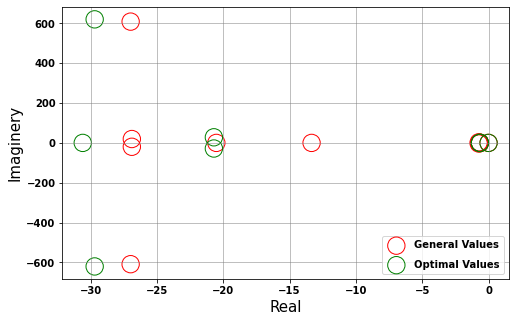

In [53]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(eigv.real,eigv.imag,s=300,facecolors = "none",edgecolors = 'r',label = "General Values")
ax.scatter(eigvo.real,eigvo.imag,s=300,facecolors = "none",edgecolors='g', label = "Optimal Values")
ax.set_xlabel("Real")
ax.set_ylabel("Imaginery")
ax.grid()
ax.legend(loc = 'lower right')
#plt.savefig('Images/eigen_val.jpg',dpi = 300, bbox_inches='tight')

#### Sensitivity Analysis of Dominant Poles

In [ ]:
nums = 10
Td0_r = np.linspace(0.001,3,nums)
Tq0_r = np.linspace(0.001,3,nums)
xdi_r = np.linspace(0.001,3,nums)
xqi_r = np.linspace(0.001,3,nums)
xddi_r = np.linspace(0.001,3,nums)
xqdi_r = np.linspace(0.001,3,nums)
Ji_r = np.linspace(0.001,40,nums)
Di_r = np.linspace(0.001,1,nums)
Rsgi_r = np.linspace(0.00001,1,nums)
Kai_r = np.linspace(1,24,nums)
Tai_r = np.linspace(0.0001,0.01,nums)
Tsvi_r = np.linspace(0.0001,0.01,nums)
Tchi_r = np.linspace(0.0001,0.01,nums)
Rdi_r = np.linspace(0.0001,0.01,nums)
Vdci_r = np.linspace(np.sqrt(2)*50,np.sqrt(2)*150,nums)

Feature = []
Values = []
senst_data = {"$T_{d0}$":Td0_r,"$T_{q0}$":Tq0_r,"$x_d$":xdi_r,"$x_q$":xqi_r,"$x_{dd}$":xddi_r,"$x_{qd}$":xqdi_r,"J":Ji_r,"D":Di_r,"$R_{sg}$":Rsgi_r,"$K_a$":Kai_r,"$T_a$":Tai_r,"$T_{sv}$":Tsvi_r,"$T_{ch}$":Tchi_r,"$R_d$":Rdi_r,"$V_{dc}$":Vdci_r}
for key,value in senst_data.items():
    Feature.append(key)
    Values.append(value)

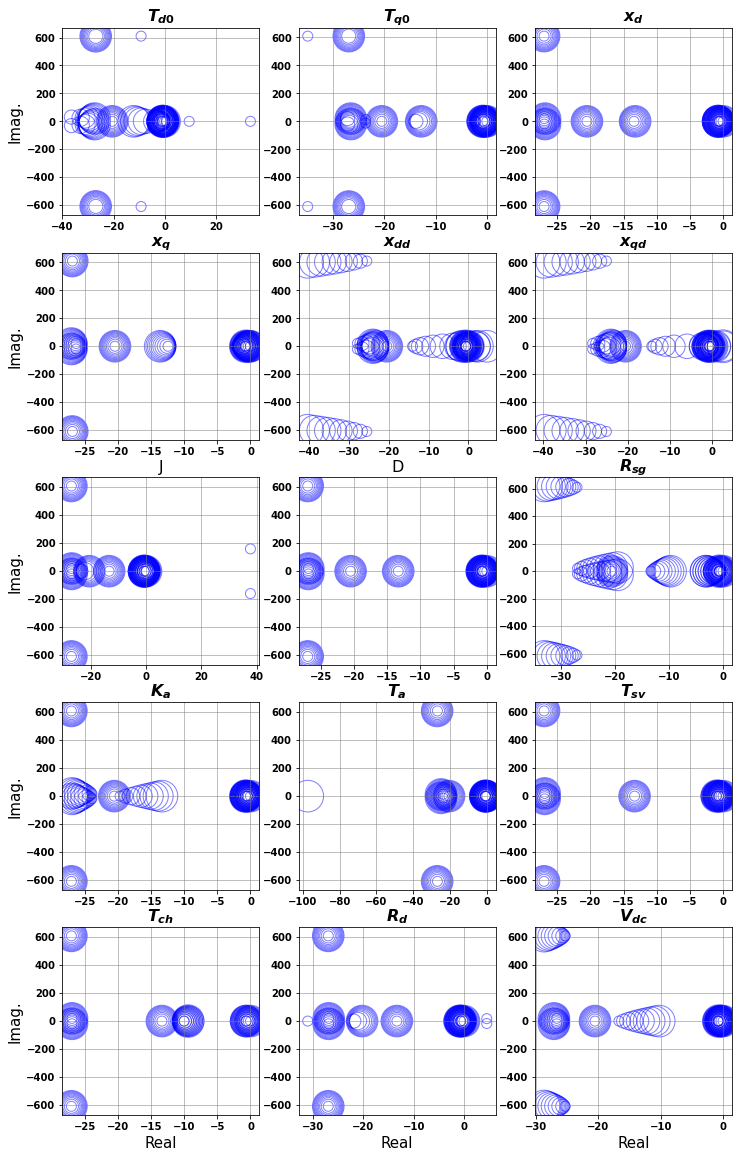

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3,figsize = (12,20))
for param_index,ax in enumerate(axes.flat):
    X_default = np.array([Td0i,Tq0i,xdi,xqi,xddi,xqdi,Ji,Di,Rsgi,Kai,Tai,Tsvi,Tchi,Rdi,Vdci])
    for i,param in enumerate(Values[param_index]):
        X_default[param_index] = param
        eigen_values = Evaluate_Eigen_Values(X_default)
        eigv=eigen_values[eigen_values.real>-100]
        im = ax.scatter(eigv.real,eigv.imag,s=100*(i+1), facecolors='none', edgecolors='b',alpha = 0.5)
    ax.set_title(Feature[param_index],fontdict =  {'fontsize': 16})
    
    if (np.array([12,13,14]) == param_index).any():
        ax.set_xlabel("Real")
    if (np.array([0,3,6,9,12]) == param_index).any():
        ax.set_ylabel("Imag.")
    ax.grid()
plt.savefig('Images/bSensitivity.pdf',dpi = 300, bbox_inches='tight')
plt.show()

### Root locus for load paramter variations

In [55]:
Jacobian_eval = Jacobian.subs([(Lf, Lfi),(Rf, Rfi),(w, wi),(Cf,Cfi),(Rc, Rci),(Lc,Lci),(Edd, Eddi),
                               (Eqd, Eqdi),(Iod, Iodi),(Ioq, Ioqi),(Tinv,Tinvi),(Kinv,Kinvi),(Vbase,Vbasei),(Ibase,Ibasei)])

In [63]:
def Evaluate_Jacobian(X,RLoadi,XLoadi):
    Td0i,Tq0i,xdi,xqi,xddi,xqdi,Ji,Di,Rsgi,Kai,Tai,Tsvi,Tchi,Rdi,Vdci= X
    J_eval = Jacobian_eval.subs([(XL,XLoadi),(RL, RLoadi),(Td0, Td0i), (Tq0, Tq0i), (xd, xdi),(xq, xqi),(xdd, xddi),(xqd, xqdi),(J, Ji),
                                 (D, Di),(Ta,Tai),(Ka,Kai),(Tsv,Tsvi),(Tch,Tchi),(Rd,Rdi),(Rsg,Rsgi),(Vdc,Vdci)])
    eval_jacobian = np.array(J_eval).astype(np.float64)
    return eval_jacobian

def Evaluate_Eigen_Values(X,RLoadi,XLoadi):
    Jacobian = Evaluate_Jacobian(X,RLoadi,XLoadi)
    return np.linalg.eigvals(Jacobian)

In [111]:
nums = 30
level = 50
RLoad = np.linspace(RLoadi-level,RLoadi+level,nums)
XLoad = np.linspace(XLoadi - level,XLoadi + level,nums)

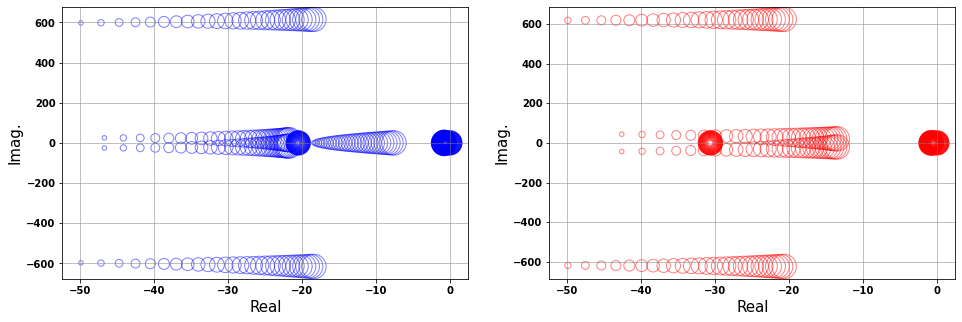

In [113]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,5))
for i,param in enumerate(RLoad):
    eigen_values = Evaluate_Eigen_Values(X_default,RLoad[i],XLoad[i])
    eigv=eigen_values[eigen_values.real>-100]
    im = ax1.scatter(eigv.real,eigv.imag,s=20*(i+1), facecolors='none', edgecolors='b',alpha = 0.5)
    
    eigen_values = Evaluate_Eigen_Values(X_optimal,RLoad[i],XLoad[i])
    eigv=eigen_values[eigen_values.real>-50]
    im = ax2.scatter(eigv.real,eigv.imag,s=20*(i+1), facecolors='none', edgecolors='r',alpha = 0.5)
ax1.grid()
ax1.set_xlabel('Real')
ax1.set_ylabel('Imag.')
ax2.grid()
ax2.set_xlabel('Real')
ax2.set_ylabel('Imag.')
plt.savefig('Images/rlocus_load.pdf',dpi = 300, bbox_inches='tight')
plt.show()

### Performing Parameter Optimization

In [ ]:
from geneticalgorithm import geneticalgorithm as ga

In [ ]:
def Objective(X):
    m = 0.1
    n = 0.01
    Eig_real = Evaluate_Eigen_Values(X).real
    Eig_imag = Evaluate_Eigen_Values(X).imag
    if (Eig_real<=0).all():
        return -(m*(Eig_real**2) - n*(Eig_imag**2)).sum()
    else:
        return np.inf

In [ ]:
#X = np.array([Td0i,Tq0i,xdi,xqi,xddi,xqdi,Ji,Di,Rsgi,Kai,Tai,Tsvi,Tchi,Rdi,Vdci])
varbound = np.array([[0.00001,3],
                     [0.00001,3],
                     [0.00001,3],
                     [0.00001,3],
                     [0.00001,3],
                     [0.00001,3],
                     [1,40],
                     [0.00001,1.0],
                     [0.00001, 1],
                     [1,24],
                     [0.0001,0.01],
                    [0.0001,0.01],
                    [0.0001,0.01],
                    [0.0001,0.01],
                     [np.sqrt(95),np.sqrt(2)*100],
                    ])
algorithm_param = {'max_num_iteration': 100,\
                   'population_size':50,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
model=ga(function=Objective,dimension=len(varbound),variable_type='real',
         variable_boundaries=varbound,algorithm_parameters=algorithm_param)

__________________________________________________ 1.0% GA is running...

c:\ProgramData\Anaconda3\lib\site-packages\geneticalgorithm\geneticalgorithm.py:353: RuntimeWarning: invalid value encountered in subtract
  normobj=maxnorm-normobj+1


 The best solution found:                                                                           
 [1.47527927e+00 4.03544283e-01 6.35738918e-02 2.94491065e+00
 5.82967049e-03 1.73255221e-02 5.71779349e+00 9.79004084e-01
 9.69122020e-01 1.70774306e+00 1.03728095e-04 1.43135922e-04
 1.22065566e-04 5.79434404e-03 1.39332758e+02]

 Objective function:
 -258437683.6900806


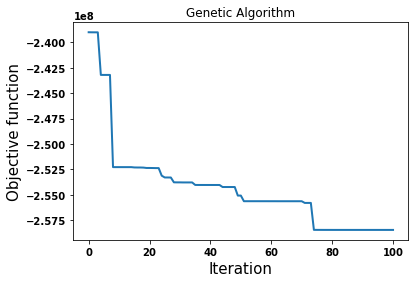

In [ ]:
model.run()
report = model.report
gens=np.arange(0,len(report),1)

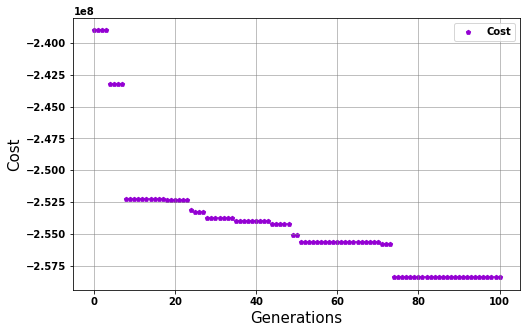

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(gens,report,marker = 'p',s=20,label = "Cost",c="darkviolet")
ax.set_xlabel("Generations")
ax.set_ylabel("Cost")
ax.grid()
ax.legend()
plt.savefig('Images/genetic_gen.jpg',dpi = 300, bbox_inches='tight')